In [1]:
"""
Author https://github.com/boguss1225
Reference : https://github.com/calmisential/TensorFlow2.0_Image_Classification
"""
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import pandas as pd
import config
from utils.test_single_image import test_single_image
from utils.evaluate import eval_model
from utils.prepare_data import get_datasets
from utils.pretrained_models import pretrained_model
import matplotlib.pyplot as plt
import config

2023-01-06 14:47:26.053430: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-06 14:47:27.075131: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64
2023-01-06 14:47:27.075201: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64
2023-01-06 14:47:27.075211: W tensorflow/c

In [2]:
# SELECT GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
# SELECT MODEL

available_models=["Xception",
                  "EfficientNetB0", "EfficientNetB1", "EfficientNetB2",
                  "EfficientNetB3", "EfficientNetB4", "EfficientNetB5",
                  "EfficientNetB6", "EfficientNetB7",
                  "EfficientNetV2B0", "EfficientNetV2B1",
                  "EfficientNetV2B2", "EfficientNetV2B3",
                  "EfficientNetV2S", "EfficientNetV2M", "EfficientNetV2L",
                  "VGG16","VGG19",
                  "DenseNet121", "DenseNet169", "DenseNet201",
                  "NASNetLarge","NASNetMobile",
                  "InceptionV3","InceptionResNetV2"
                  ]

def get_model():
    model = pretrained_model(model_name="EfficientNetV2B0",
                            load_weight=None)

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                  metrics=['accuracy', # add more metrics if you want
                            tf.keras.metrics.AUC(),
                            tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall(),
                            ])
    return model

In [4]:
# GPU settings
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
# LOAD DATA
train_generator, valid_generator, test_generator, \
train_num, valid_num, test_num = get_datasets()

Found 500 images belonging to 5 classes.
Found 125 images belonging to 5 classes.
Found 60 images belonging to 5 classes.


In [6]:
"""
Apply image data augmentation in 'utils.prepare_data.py' manually
"""

"\nApply image data augmentation in 'utils.prepare_data.py' manually\n"

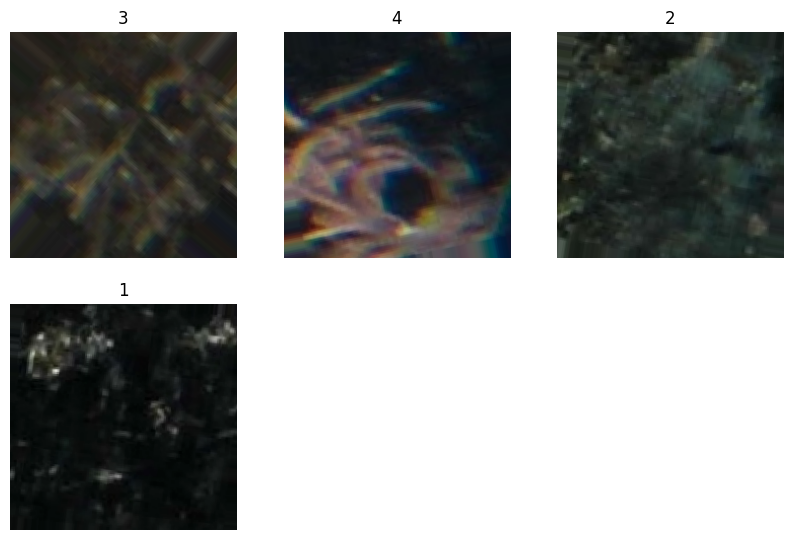

In [7]:
"""
## Visualize the data after augmentaion
Here are the first 9 images in the training dataset. 
Label 0 : "worm"
Label 1 : "vegetation-1"
"""
if config.BATCH_SIZE > 9 :
    range_val = 9
else :
    range_val = config.BATCH_SIZE

plt.figure(figsize=(10, 10))
for i in range(range_val):
    ax = plt.subplot(3, 3, i + 1)
    img, label = train_generator.next()
    plt.imshow(img[0].astype("uint8"))
    plt.title(label[0].argmax())
    plt.axis("off")

In [8]:
"""
Callbacks
"""

# tensorboard = tf.keras.callbacks.TensorBoard(log_dir='log')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=config.model_dir+config.model_save_name+".keras",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    patience=20,
    restore_best_weights=True
)

callbacks = [
#     tensorboard, 
    model_checkpoint_callback, 
    early_stop_callback
]

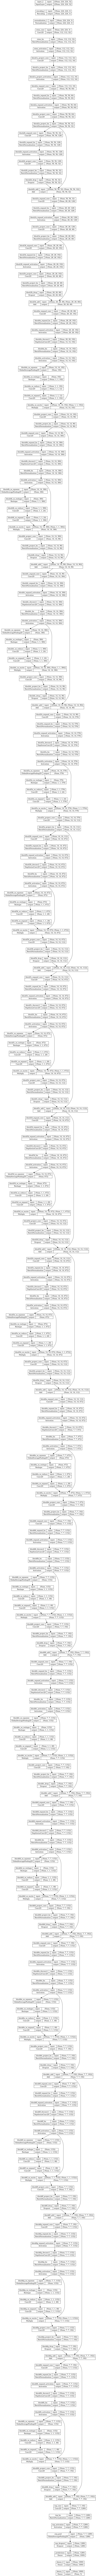

In [10]:
model = get_model()
tf.keras.utils.plot_model(model, show_shapes=True)

In [11]:
"""
Train the model
"""
history = model.fit(train_generator,
                    epochs=config.EPOCHS,
                    steps_per_epoch=train_num // config.BATCH_SIZE,
                    validation_data=valid_generator,
                    validation_steps=valid_num // config.BATCH_SIZE,
                    callbacks=callbacks)

Epoch 1/100


2023-01-06 14:48:20.908464: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-01-06 14:48:23.943250: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2023-01-06 14:48:24.583607: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-01-06 14:48:24.616341: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55860bae31f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-01-06 14:48:24.616371: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2023-01-06 14:48:24.621165: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] d

125/125 [==============================] - 43s 58ms/step - loss: 1.6285 - accuracy: 0.2080 - auc_1: 0.5228 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 1.6419 - val_accuracy: 0.1694 - val_auc_1: 0.4545 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/100
125/125 [==============================] - 5s 43ms/step - loss: 1.6141 - accuracy: 0.2140 - auc_1: 0.5206 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 1.5797 - val_accuracy: 0.2823 - val_auc_1: 0.5855 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/100
125/125 [==============================] - 5s 41ms/step - loss: 1.5980 - accuracy: 0.2440 - auc_1: 0.5575 - precision_1: 0.2857 - recall_1: 0.0080 - val_loss: 1.6188 - val_accuracy: 0.1532 - val_auc_1: 0.4840 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/100
125/125 [==============================] - 5s 41ms/step - loss: 1.6149 - accuracy: 0.2260 - auc_1: 0.5156 - precision_1: 0.0000e+00 - recall_1: 0.000

Epoch 30/100
125/125 [==============================] - 5s 42ms/step - loss: 1.6248 - accuracy: 0.1800 - auc_1: 0.4907 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 1.6097 - val_accuracy: 0.1532 - val_auc_1: 0.5084 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 31/100
125/125 [==============================] - 5s 42ms/step - loss: 1.6151 - accuracy: 0.2120 - auc_1: 0.4870 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 1.5985 - val_accuracy: 0.2258 - val_auc_1: 0.5700 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 32/100
125/125 [==============================] - 5s 42ms/step - loss: 1.6072 - accuracy: 0.2040 - auc_1: 0.5186 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 1.6059 - val_accuracy: 0.2177 - val_auc_1: 0.5087 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 33/100
125/125 [==============================] - 5s 42ms/step - loss: 1.6029 - accuracy: 0.2100 - auc_1: 0.5466 - precision_1: 0.000

In [ ]:
# save the whole model
model.save(config.model_dir+config.model_save_name+".h5")

In [ ]:
hist_df = pd.DataFrame(history.history)
with open(config.model_dir+"train_history.csv", mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
# Evaluation
eval_model(model)

In [ ]:
# detect samples
test_single_image(config.test_image_path, model)